# Instacart Basket Analysis EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aisles = pd.read_csv('aisles.csv')
departments =  pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

## Explore individual datasets
### Aisles
Contains 134 unique product aisles.

In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
aisles['aisle'].nunique()

134

In [8]:
aisles['aisle'].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

### Departments
There are 21 unique departments.

In [10]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [12]:
departments['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

### Order Products Prior and Train
The prior dataset has information on all priors orders from the customers except their last ones, while the orders products train contains the most recent order of each customer.

Both datasets show the order in which the item was added to the cart, as well as a dummy for whether the product is reordered or not.

In [14]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [15]:
prior[['add_to_cart_order','reordered']].describe()

,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07
mean,8.351076e+00,5.896975e-01
std,7.126671e+00,4.918886e-01
min,1.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00
50%,6.000000e+00,1.000000e+00
75%,1.100000e+01,1.000000e+00
max,1.450000e+02,1.000000e+00


In [16]:
prior[['order_id','product_id']].nunique()

order_id      3214874
product_id      49677
dtype: int64

In [17]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
train[['add_to_cart_order','reordered']].describe()

,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06
mean,8.758044e+00,5.985944e-01
std,7.423936e+00,4.901829e-01
min,1.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00
50%,7.000000e+00,1.000000e+00
75%,1.200000e+01,1.000000e+00
max,8.000000e+01,1.000000e+00


In [19]:
train[['order_id','product_id']].nunique()

order_id      131209
product_id     39123
dtype: int64

### Orders

In [21]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [22]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


#### Number of orders per user

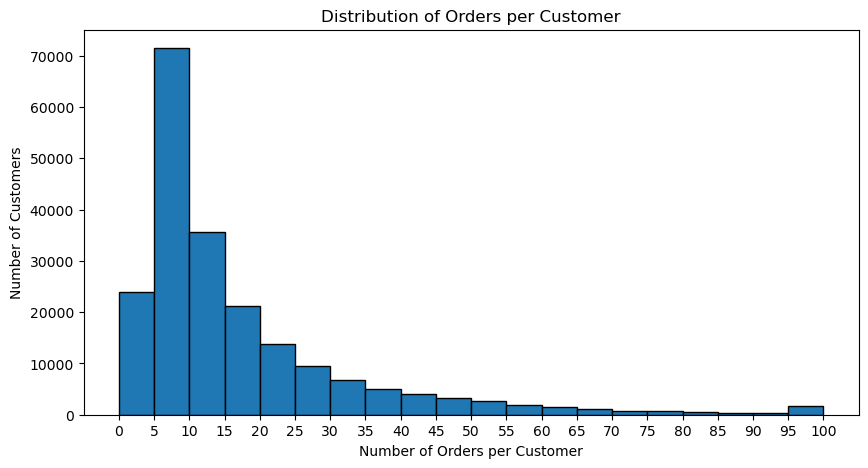

In [24]:
# Count orders per user
orders_per_user = orders.groupby('user_id')['order_id'].count()

plt.figure(figsize=(10,5))
plt.hist(orders_per_user, bins=range(0, orders_per_user.max()+5, 5), edgecolor='black')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.xticks(range(0, orders_per_user.max()+5, 5))
plt.show()

#### Distribution of order for each day of week and hour of day

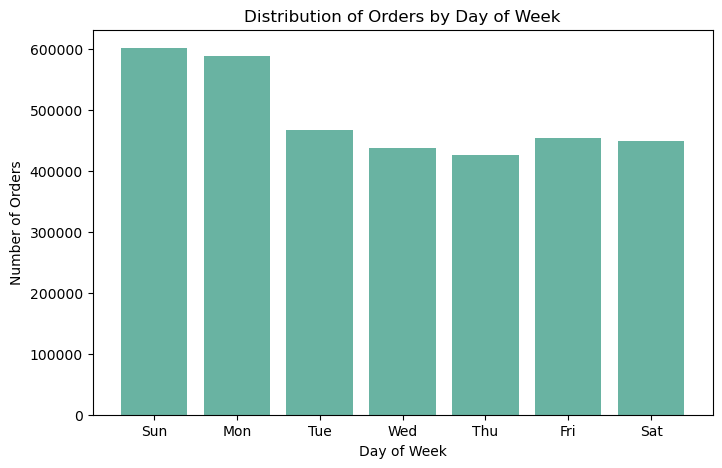

In [26]:
plt.figure(figsize=(8,5))
plt.hist(orders['order_dow'], bins=range(0,8), rwidth=0.8, align='left',color='#69b3a2')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Day of Week')
plt.xticks(range(0,7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']) # Assuming 0 is Sunday
plt.show()

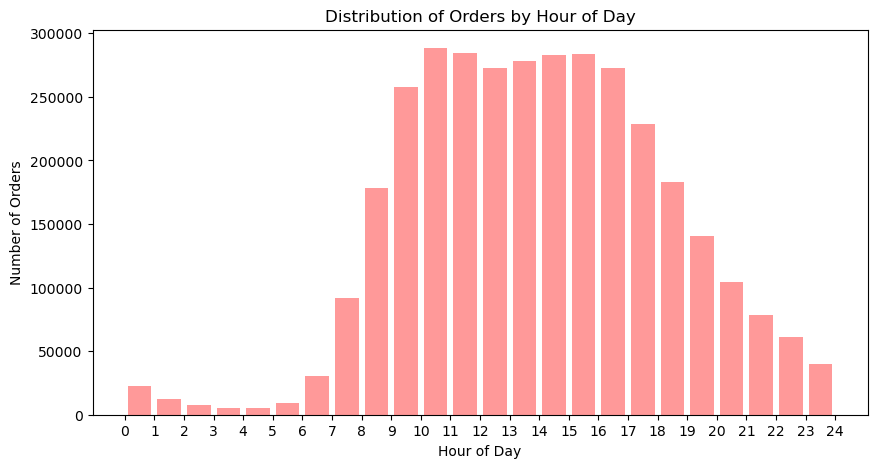

In [27]:
plt.figure(figsize=(10,5))
plt.hist(orders['order_hour_of_day'],
    bins=range(0,25),
    rwidth=0.8,
    color='#ff9999'
)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of Day')
plt.xticks(range(0,25,1))
plt.show()

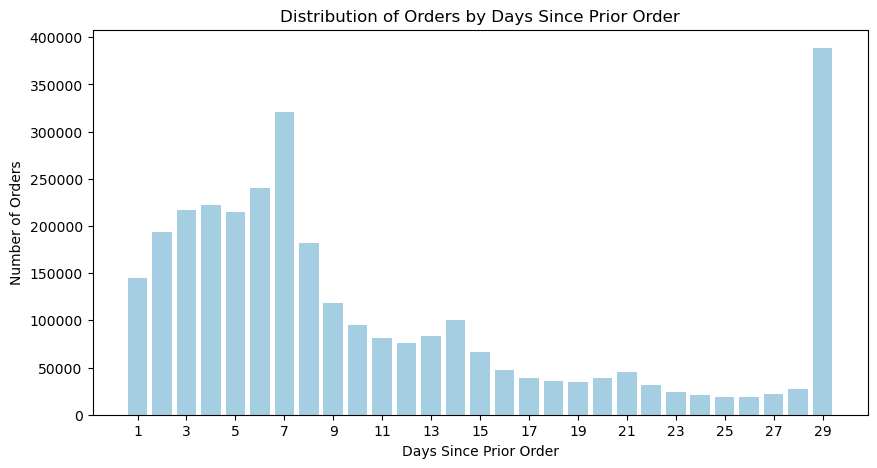

In [28]:
plt.figure(figsize=(10,5))
plt.hist(
    orders['days_since_prior_order'].dropna(),
    bins=range(1,31),
    rwidth=0.8,
    align='left',
    color='#a6cee3'
)
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Days Since Prior Order')
plt.xticks(range(1,31,2))
plt.show()

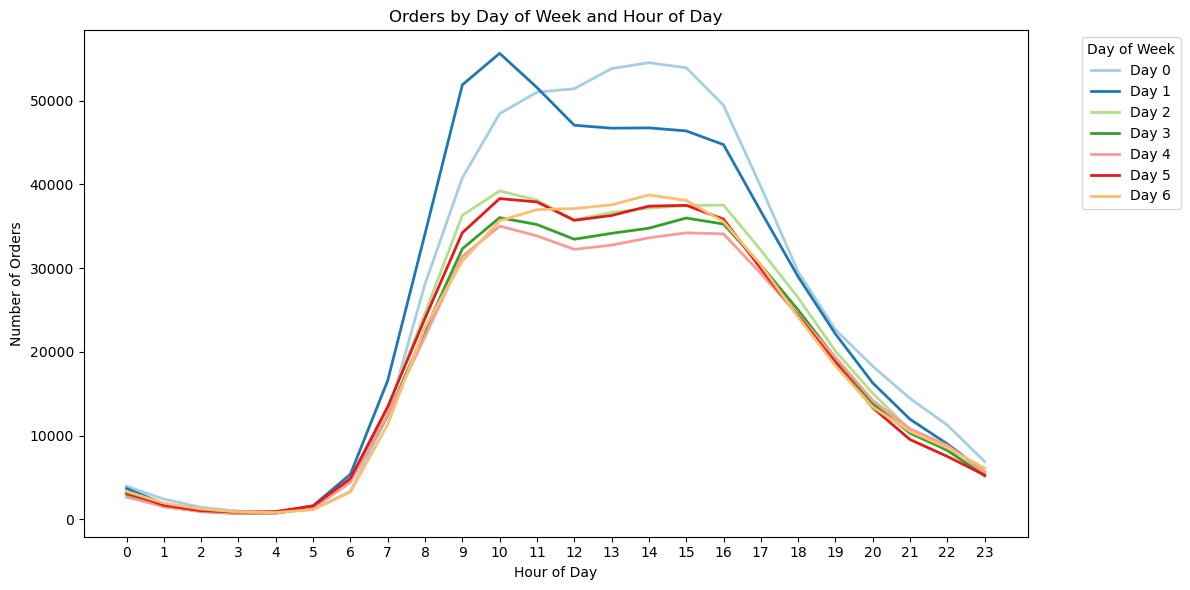

In [29]:
#Group orders by DOW and hour
dow_hour_counts = orders.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().unstack(fill_value=0)

plt.figure(figsize=(12,6))

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f']

for i, dow in enumerate(dow_hour_counts.index):
    plt.plot(dow_hour_counts.columns, dow_hour_counts.loc[dow], label=f'Day {dow}', color=colors[i],linewidth=2)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of Week and Hour of Day')
plt.xticks(range(0,24))
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Products

In [31]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [32]:
products['product_id'].nunique()

49688

## Merging datasets
### Product Information

In [34]:
product_info = products.merge(aisles, on = 'aisle_id')
product_info = product_info.merge(departments, on = 'department_id')

#### Product by aisle and department

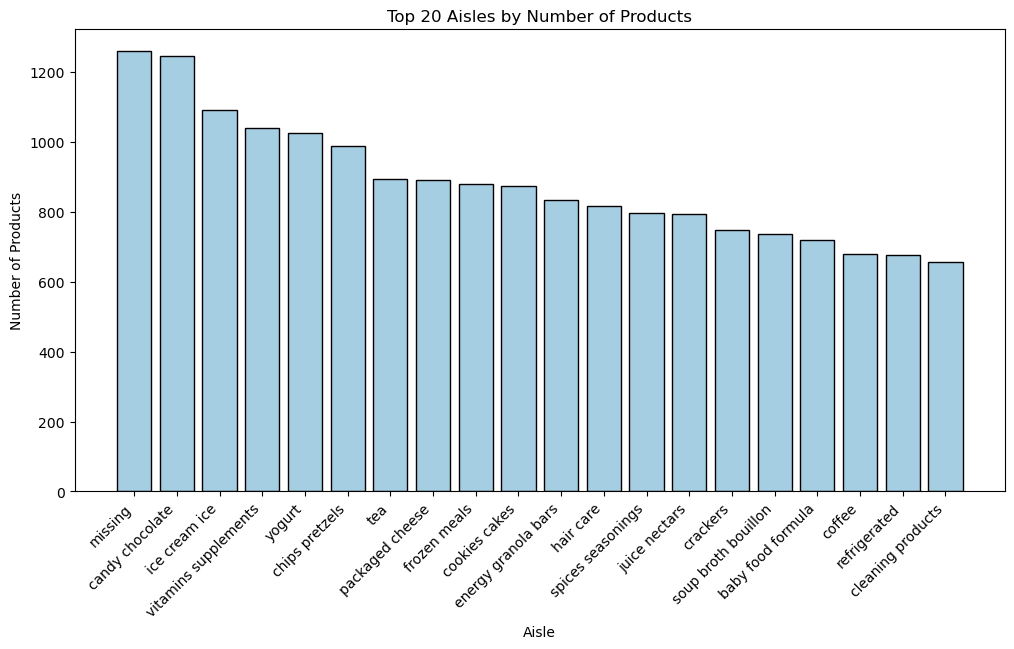

In [36]:
product_by_aisle = product_info.groupby('aisle')['product_id'].count()

# Get top 20 aisles
top_20_aisle = product_by_aisle.sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(top_20_aisle.index, top_20_aisle.values, color='#a6cee3', edgecolor='black')
plt.xlabel('Aisle')
plt.ylabel('Number of Products')
plt.title('Top 20 Aisles by Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()

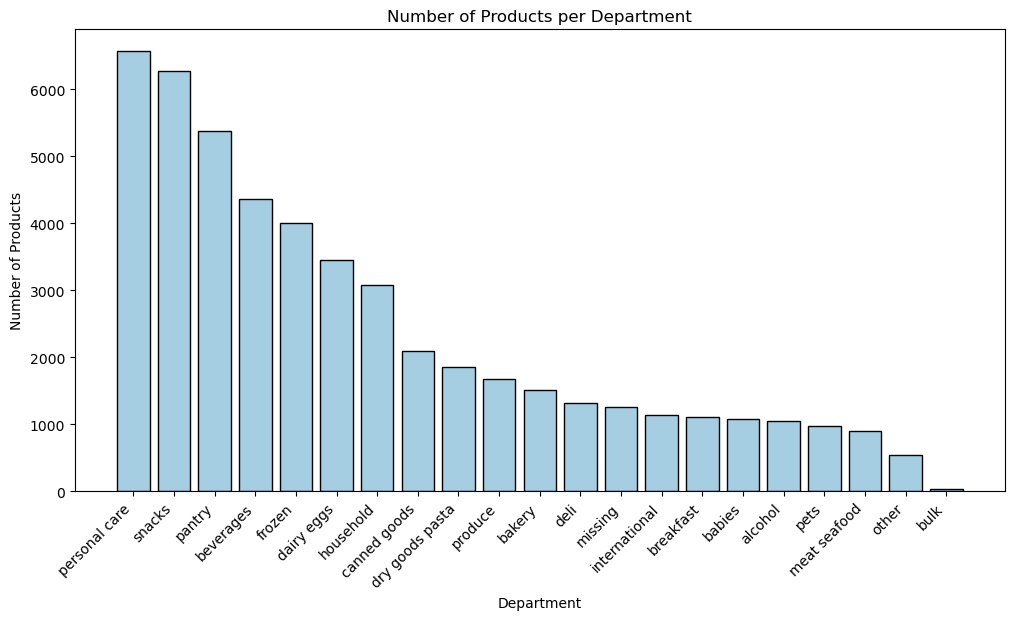

In [37]:
# Count products per department
product_by_dep = product_info.groupby('department')['product_id'].count().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(product_by_dep.index, product_by_dep.values, color='#a6cee3', edgecolor='black')
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.title('Number of Products per Department')
plt.xticks(rotation=45, ha='right')
plt.show()

### Merging Orders and Product details

In [39]:
train_data = pd.merge(prior, orders, on='order_id',how='left')
train_data = pd.merge(train_data, product_info, on = 'product_id',how='left')

In [40]:
test_data = pd.merge(train, orders, on='order_id',how='left')
test_data = pd.merge(test_data, product_info, on = 'product_id',how='left')

### Additional EDA on complete training set
#### Distribution of basket size

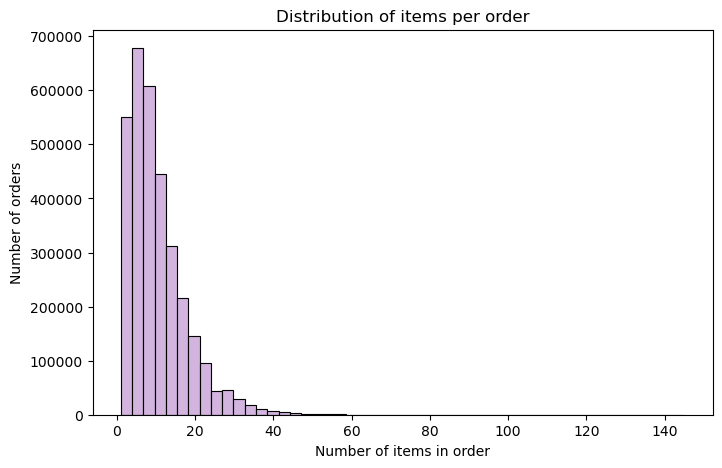

In [42]:
items_per_order = train_data.groupby('order_id')['product_id'].count().reset_index(name='num_items')

plt.figure(figsize=(8,5))
sns.histplot(items_per_order['num_items'], bins=50, kde=False, color = '#C39BD3')
plt.xlabel('Number of items in order')
plt.ylabel('Number of orders')
plt.title('Distribution of items per order')
plt.show()

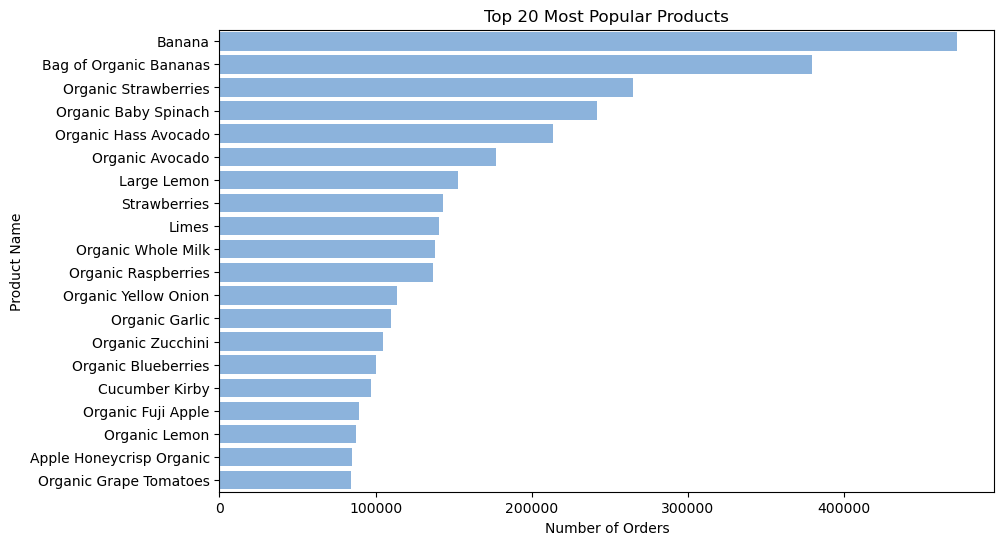

In [43]:
top_products = (
    train_data['product_name']
    .value_counts()
    .head(20)
    .reset_index()
)
top_products.columns = ['product_name', 'order_count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='order_count', y='product_name', color='#7FB3E9')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.title('Top 20 Most Popular Products')
plt.show()

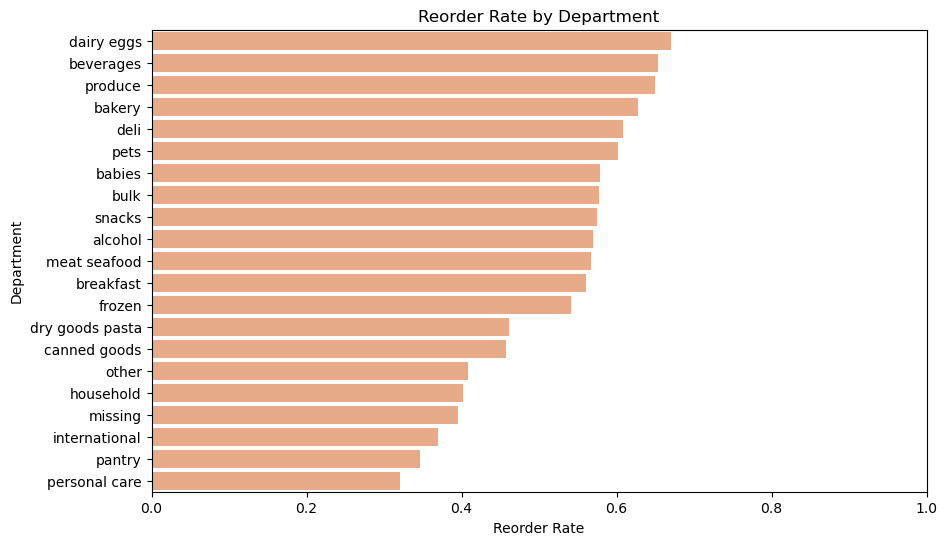

In [44]:
# Compute reorder rate by department
dept_reorder_rate = (
    train_data.groupby('department')['reordered']
    .mean()
    .reset_index()
    .sort_values('reordered', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=dept_reorder_rate, x='reordered', y='department', color='#F7A77A')
plt.xlabel('Reorder Rate')
plt.ylabel('Department')
plt.title('Reorder Rate by Department')
plt.xlim(0, 1)
plt.show()

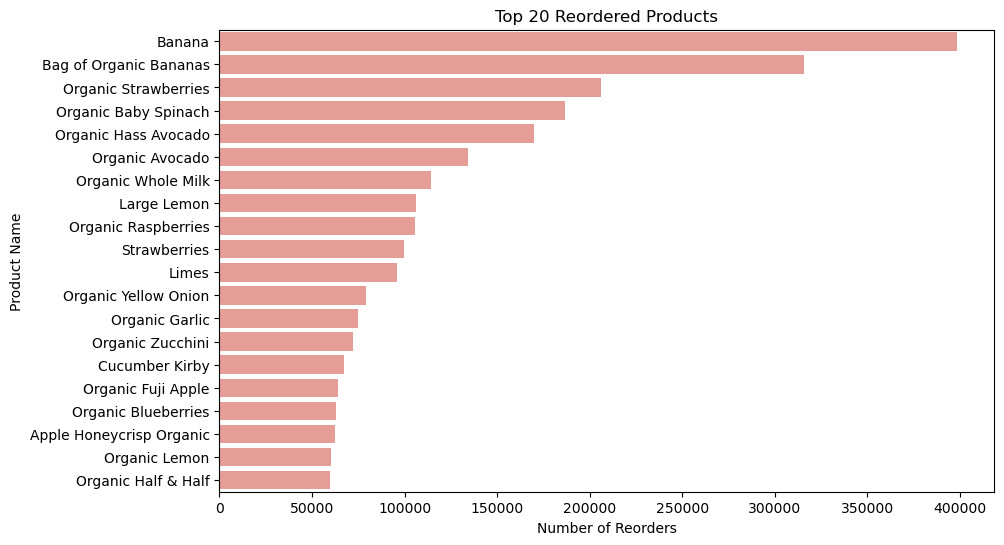

In [45]:
top_reordered = (
    train_data.groupby('product_name')['reordered']
    .sum()
    .reset_index()
    .sort_values('reordered', ascending=False)
    .head(20)
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_reordered, x='reordered', y='product_name', color = '#F1948A')
plt.xlabel('Number of Reorders')
plt.ylabel('Product Name')
plt.title('Top 20 Reordered Products')
plt.show()

In [46]:
# Export merge datasets for next steps
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')